<h2><center><font size='6'>Housing Prices Notebook</font></center></h2>

Table Of Contents  
=

1. <a href='#Link-SecIntro'>Introduction</a> 
2. <a href='#Link-SecDataPrep'>Data preparation</a> 
3. <a href='#Link-SecDataExpl'>Data exploration</a> 
    - <a href='#Link-SecDataExpl-Summary'>Data summary</a>
    - <a href='#Link-SecDataExpl-Supplem'>Supplemental lists of features</a>
    - <a href='#Link-SecDataExpl-GenAss'>General assesment of correlations/associations</a><br><br>
4. <a href='#Link-SecImp'>Data imputation</a>
    - <a href='#Link-SecImp-Bsmt'>Basement-related features</a>
    - <a href='#Link-SecImp-Gar'>Garage-related features</a>
    - <a href='#Link-SecImp-FP'>Fireplace-, pool-, miscellaneous-, fence-, and alley-related features</a>
    - <a href='#Link-SecImp-Others'>Rest of the features</a><br><br>
5. <a href='#Link-SecOrdPrep'>Preparation of ordinal categorical data for label encoding</a>
6. <a href='#Link-SecModel'>Model training, selection, and predictions</a>
    - <a href='#Link-SecModel-DataPrepr'>Data preprocessing</a>
    - <a href='#Link-SecModel-Training'>Model training</a><br>
      a) <a href='#Link-SecModel-Training-LR'>Linear regression</a><br>
      b) <a href='#Link-SecModel-Training-DTR'>Decision tree regressor</a><br>
      c) <a href='#Link-SecModel-Training-RFR'>Random forest regressor</a><br>
      d) <a href='#Link-SecModel-Training-XGBR'>Gradient boosting regressor</a><br>
    - <a href='#Link-SecModel-Selection'>Model selection and predictions</a><br><br>
7. <a href='#Link-SecSubm'>Submission</a>  

# <a id='Link-SecIntro'>Introduction</a>  

In this notebook we explore a housing pricing dataset using Python libraries such as `pandas`, `numpy`, `matplotlib`, `seaborn`, and `dython`. After that, we will prepare the dataset for model training, after that we will consider four different ML models using `sklearn` and `xgboost` libraries, and then assess the performance of each model using cross validation. Ultimately, we will choose the best ML model, select the best parameters for this model using `GridSearchCV`, and apply the model on the test dataset to predict the housing prices in Boston. Finally, we will prepare the predictions for a submission to the [Housing Prices Competition for Kaggle Learn Users](https://www.kaggle.com/c/home-data-for-ml-course) competition.

# <a id='Link-SecDataPrep'>Data preparation</a>  

In [1]:
#Install/load required packages
#!pip install dython 
import dython
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [2]:
#Upload and record housing prices data 
train_file_path = 'train.csv'
test_file_path = 'test.csv'

train_data = pd.read_csv(train_file_path, index_col='Id')
test_data = pd.read_csv(test_file_path, index_col='Id')

# <a id='Link-SecDataExpl'>Data exploration</a>  

## <a id='Link-SecDataExpl-Summary'>Data summary</a>

In [3]:
#Visualize the first entries of the dataset
train_data.head()
#test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Brief summary of numerical columns
train_data.describe()
#test_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
#Brief summary of categorical columns
train_data.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [6]:
#Identify columns with 'NaN' values and count the NaNs (train set)
train_data.isnull().sum()[train_data.isna().sum() != 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [7]:
#Identify columns with 'NaN' values and count the NaNs (test set)
test_data.isna().sum()[test_data.isna().sum() != 0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

We can see that there is a significant portion of missing values in both the training and testing datasets. However, as we will see later on, most of the missing values can be imputed in a clever way, meaning that the actual values can be deduced from the information provided in columns that don't contain missing entries.

## <a id='Link-SecDataExpl-Supplem'>Supplemental lists of features</a>

In this subsection we create supplemental lists of features that we will be using for a clever imputation of missing data. 

In [8]:
num_cols = [col for col in train_data.columns if train_data[col].dtype in ['int64', 'float64']]

#Numerical columns without 'SalePrice' and 'LotFrontage'
num_cols_no_SPLF = [col for col in num_cols if col not in ['SalePrice', 'LotFrontage']]

cat_cols = [col for col in train_data.columns if train_data[col].dtype == 'object']

all_cols = cat_cols + num_cols

#Print out the total number of columns to make sure that nothing is missing
print(f'The total number of columns: {len(all_cols)}.')
print(f'Expected number of columns: {train_data.shape[1]}.')

The total number of columns: 80.
Expected number of columns: 80.


In [9]:
#Create lists of garage-related numerical and categorical features  
gar_num_cols = ['GarageYrBlt','GarageCars','GarageArea']
gar_cat_cols = ['GarageType','GarageFinish','GarageQual','GarageCond']
gar_cols = gar_num_cols + gar_cat_cols

In [10]:
#Create lists of basement-related numerical and categorical features  
bsmt_num_cols = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
                 'TotalBsmtSF','BsmtFullBath','BsmtHalfBath']
bsmt_cat_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 
                 'BsmtFinType1', 'BsmtFinType2']
bsmt_cols = bsmt_num_cols + bsmt_cat_cols

## <a id='Link-SecDataExpl-GenAss'>General assesment of correlations/associations </a>

Here, we will peform a general assesment of correlation/assosiation between the <span style="color:FireBrick;">'SalePrice'</span> column and rest of the features. The <span style="color:FireBrick;">'SalePrice'</span> is a numerical column, whereas the other 79 columns are either numerical or categorical. This means, we will need to analyze 2 different types of association/correlation: 1) a numerical-numerical correlation and 2) a categorical-numerical association.

To estimate the corresponding associations/correlations, we will use the [dython](http://shakedzy.xyz/dython/) library (see [this link](https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9) and [this kaggle notebook](https://www.kaggle.com/alexkoshchii/top-7-titanic-dataset-notebook) for more examples). The dython library enables one to evaluate the following:

* The `categorical-categorical` feature association (e.g. using the _Theil's U_ measure).
* The `numerical-categorical` feature association (using the _correlation ratio_ measure called Eta). 
* The `numerical-numerical` correlation (using the _Pearson's R_ measure).
<a id='Fig1Link'></a>

C:\Users\alexk\anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


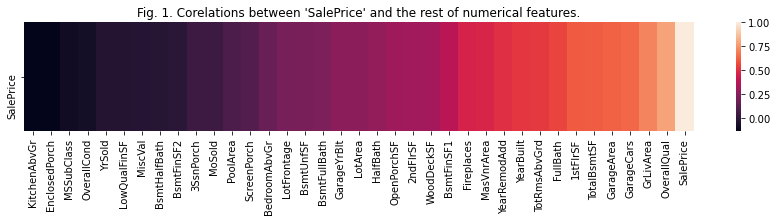

In [11]:
from dython.nominal import compute_associations

#Compute numerical-numerical correlations
num_corr_table = compute_associations(train_data[num_cols])

#Visualize correlations
plt.subplots(figsize=(15,2))
fig1 = sns.heatmap(num_corr_table[['SalePrice']].sort_values(by=['SalePrice']).T)
fig1.set(title = "Fig. 1. Corelations between 'SalePrice' and the rest of numerical features.");

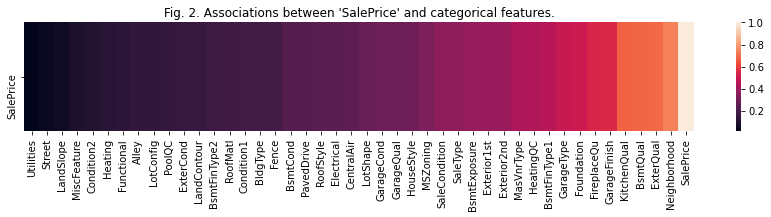

In [12]:
#Add 'SalePrice' to the list of categorical features for the data visualisation purposes
cat_cols.append('SalePrice')

#Compute numerical-categorical feature associations
numcat_assoc_table = compute_associations(train_data[cat_cols])

#Visualize associations
plt.subplots(figsize=(15,2))
fig2 = sns.heatmap(numcat_assoc_table[['SalePrice']].sort_values(by=['SalePrice']).T)
fig2.set(title = "Fig. 2. Associations between 'SalePrice' and categorical features.")

#Remove 'SalePrice' from the list of categorical features
cat_cols.pop();

We notice that most of the features that contain missing values in the train/test dataset have a strong degree of association/correlation with <span style="color:FireBrick;">'SalePrice'</span>. This means that we should carefully impute the corresponding missing values, as they may have a significant impact on the predictions of our model.

# <a id='Link-SecImp'>Data imputation</a>

In order to better understand the data imputation strategy discussed below, one may need to look up occasionaly the "Data Description" information for the housing-prices dataset provided [here](https://www.kaggle.com/c/home-data-for-ml-course/data).

## <a id='Link-SecImp-Bsmt'>Basement-related features</a>

We will start with imputing the basement-related features. First, we will visualize the corresponding data and notice that, for example, the hight of a basement (<span style="color:FireBrick;">'BsmtQual'</span>) and its area (<span style="color:FireBrick;">'TotalBsmtSF'</span>) have a strong association/correlation with the price of a house.

C:\Users\alexk\anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


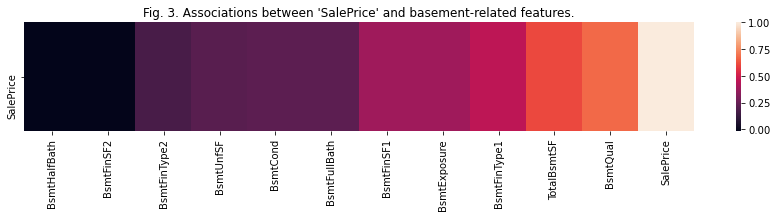

In [13]:
#Add 'SalePrice' to the list of basement-related features for the data visualisation purposes
bsmt_cols.append('SalePrice')

#Compute associations
bsmt_assoc_table = compute_associations(train_data[bsmt_cols])

#Visualize associations
plt.subplots(figsize=(15,2))
fig3 = sns.heatmap(bsmt_assoc_table[['SalePrice']].sort_values(by=['SalePrice']).T)
fig3.set(title = "Fig. 3. Associations between 'SalePrice' and basement-related features.");
bsmt_cols.pop();

In [14]:
#Before imputing the data, we create a copy of the train and test datasets
train_data_imp = train_data.copy() 
test_data_imp = test_data.copy() 

In [15]:
#Locate the rows with a basement area = 0 (meaning there are no basements) 
#and replace the corresponding 'NaN' values of the garage categorical columns with 'NoBsmt'
train_data_imp.loc[train_data_imp['TotalBsmtSF'] == 0, bsmt_cat_cols] = \
train_data_imp.loc[train_data_imp['TotalBsmtSF'] == 0, bsmt_cat_cols].fillna(value = 'NoBsmt')

test_data_imp.loc[test_data_imp['TotalBsmtSF'] == 0, bsmt_cat_cols] = \
test_data_imp.loc[test_data_imp['TotalBsmtSF'] == 0, bsmt_cat_cols].fillna(value = 'NoBsmt')

In [16]:
#Count remaining 'NaN' values in the basement-related columns in the train set
train_data_imp[bsmt_cols].isna().sum()[train_data_imp[bsmt_cols].isna().sum() != 0]

BsmtExposure    1
BsmtFinType2    1
dtype: int64

In [17]:
#Count remaining 'NaN' values in the basement-related columns in the test set
test_data_imp[bsmt_cols].isna().sum()[test_data_imp[bsmt_cols].isna().sum() != 0]

BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
BsmtQual        3
BsmtCond        4
BsmtExposure    3
BsmtFinType1    1
BsmtFinType2    1
dtype: int64

One can see that most of the missing values in the basement-related features have been fixed.

## <a id='Link-SecImp-Gar'>Garage-related features</a>

In a similar fashion, we will fix most of the 'NaN' values in the garage-related columns.

C:\Users\alexk\anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


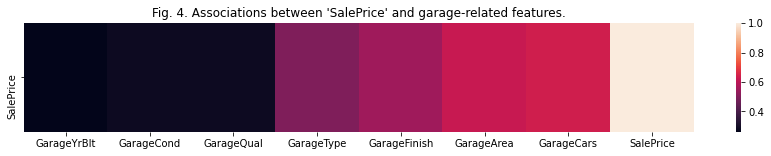

In [18]:
#Add 'SalePrice' to the list of garage-related features for the data visualisation purposes
gar_cols.append('SalePrice')

#Compute associations
gar_assoc_table = compute_associations(train_data[gar_cols])

#Visualize associations
plt.subplots(figsize=(15,2))
fig4 = sns.heatmap(gar_assoc_table[['SalePrice']].sort_values(by=['SalePrice']).T)
fig4.set(title = "Fig. 4. Associations between 'SalePrice' and garage-related features.");
gar_cols.pop();

In [19]:
#Locate the rows with a garage area = 0 (meaning there are no garages in such houses) 
#and replace the corresponding 'NaN' categorical values with 'NoGarage'
train_data_imp.loc[train_data_imp.GarageArea == 0, gar_cat_cols] = \
train_data_imp.loc[train_data_imp.GarageArea == 0, gar_cat_cols].fillna(value = 'NoGarage')

test_data_imp.loc[test_data_imp.GarageArea == 0, gar_cat_cols] = \
test_data_imp.loc[test_data_imp.GarageArea == 0, gar_cat_cols].fillna(value = 'NoGarage')

#When there is no garage, then replace the 'NaN' values in the 'GarageYrBlt' column with 0
train_data_imp.loc[train_data_imp.GarageArea == 0, 'GarageYrBlt'] = \
train_data_imp.loc[train_data_imp.GarageArea == 0, 'GarageYrBlt'].fillna(value = 0)

test_data_imp.loc[test_data_imp.GarageArea == 0, 'GarageYrBlt'] = \
test_data_imp.loc[test_data_imp.GarageArea == 0, 'GarageYrBlt'].fillna(value = 0)

In [20]:
#Count remaining 'NaN' values in the garage-related columns in the train set
train_data_imp[gar_cols].isna().sum()[train_data_imp[gar_cols].isna().sum() != 0]

Series([], dtype: int64)

In [21]:
#Count remaining 'NaN' values in the basement-related columns in the test set
test_data_imp[gar_cols].isna().sum()[test_data_imp[gar_cols].isna().sum() != 0]

GarageYrBlt     2
GarageCars      1
GarageArea      1
GarageFinish    2
GarageQual      2
GarageCond      2
dtype: int64

One can see that most of the missing values in the garage-related features have been fixed, as well.

## <a id='Link-SecImp-FP'>Fireplace-, pool-, miscellaneous-, fence-, and alley-related features</a>

In this subsection we will impute the rest of the missing values whose values may be deduced from the information provided in columns that don't contain missing entries.

First, we will consider the fireplace-, pool-, and miscallaneous-related features. We notice that <span style="color:FireBrick;">'FireplaceQu'</span>, <span style="color:FireBrick;">'PoolQC'</span>, and <span style="color:FireBrick;">'MiscFeature'</span> contain significant amount of missing values. These values can be imputed using the following strategy: when the number of fireplaces (<span style="color:FireBrick;">'Fireplaces'</span>)/the pool area (<span style="color:FireBrick;">'PoolArea'</span>)/the number of miscellaneous features (<span style="color:FireBrick;">'MiscVal'</span>) equals to 0, then the corresponding 'NaN' values in the <span style="color:FireBrick;">'FireplaceQu'</span>/<span style="color:FireBrick;">'PoolQC'</span>/<span style="color:FireBrick;">'MiscFeature'</span> column indicate that the corresponding house did not contain such a feature.  

Since the imputation strategy for these 3 columns is identical, it is convenient to define a general function that will be performing such an imputation.

In [22]:
def replace_na_values(check_column, nan_column, replace_value):
    train_data_imp.loc[(train_data_imp[nan_column].isna()) & 
                   (train_data_imp[check_column] == 0), nan_column] = replace_value
    test_data_imp.loc[(test_data_imp[nan_column].isna()) & 
                   (test_data_imp[check_column] == 0), nan_column] = replace_value

In [23]:
#Impute the fireplace-, pool-, and miscellaneous-related features
replace_na_values('Fireplaces', 'FireplaceQu', 'NoFireplace')
replace_na_values('PoolArea', 'PoolQC', 'NoPool')
replace_na_values('MiscVal', 'MiscFeature', 'NoMisc')

Now let's impute the missing values in <span style="color:FireBrick;">'Fence'</span> and <span style="color:FireBrick;">'Alley'</span> columns. The respective imputation strategy is even simpler than for the <span style="color:FireBrick;">'FireplaceQu'</span>/<span style="color:FireBrick;">'PoolQC'</span>/<span style="color:FireBrick;">'MiscFeature'</span> columns. According to [this description](https://www.kaggle.com/c/home-data-for-ml-course/data), the 'NaN' values in <span style="color:FireBrick;">'Fence'</span> and <span style="color:FireBrick;">'Alley'</span> columns are most likely due to the absence of the corresponding feature. Therefore, we will simply replace the coresponding NaNs by 'NoFence' or 'NoAlley'.

In [24]:
#Replace NaN 'Fence' values
train_data_imp.loc[train_data_imp['Fence'].isna(), 'Fence'] = 'NoFence'
test_data_imp.loc[test_data_imp['Fence'].isna(), 'Fence'] = 'NoFence'

#Replace NaN 'Alley' values
train_data_imp.loc[train_data_imp['Alley'].isna(), 'Alley'] = 'NoAlley'
test_data_imp.loc[test_data_imp['Alley'].isna(), 'Alley'] = 'NoAlley'

## <a id='Link-SecImp-Others'>Rest of the features</a>

At this stage, none of the remaining 'NaN' values can be imputed in a clever manner. Luckily, most of the remaning columns contain only a few 'NaN' entries. The only exception is the <span style="color:FireBrick;">'LotFrontage'</span> column, which contains significant number of NaNs. By taking a look at [Fig. 1](#Fig1Link) and checking the correlation between <span style="color:FireBrick;">'LotFrontage'</span> and <span style="color:FireBrick;">'SalePrice'</span>, we notice that the <span style="color:FireBrick;">'LotFrontage'</span> feature is not strongly correlated with the <span style="color:FireBrick;">'SalePrice'</span>. In addition, by checking [here](https://www.kaggle.com/c/home-data-for-ml-course/data) the feature description information, we notice that most likely the <span style="color:FireBrick;">'LotArea'</span> column (by default) contains information about <span style="color:FireBrick;">'LotFrontage'</span>. Therefore, we decide to remove the <span style="color:FireBrick;">'LotFrontage'</span> column from our model training/prediction.train_data_imp.drop(['LotFrontage'], axis=1, inplace=True)
test_data_imp.drop(['LotFrontage'], axis=1, inplace=True)

In [25]:
train_data_imp.drop(['LotFrontage'], axis=1, inplace=True)
test_data_imp.drop(['LotFrontage'], axis=1, inplace=True)

In [26]:
#Identify columns with 'NaN' values and count NaNs (train set)
train_data_imp.isna().sum()[train_data_imp.isna().sum() != 0]

MasVnrType      8
MasVnrArea      8
BsmtExposure    1
BsmtFinType2    1
Electrical      1
dtype: int64

In [27]:
test_data_imp.isna().sum()[test_data_imp.isna().sum() != 0]

MSZoning         4
Utilities        2
Exterior1st      1
Exterior2nd      1
MasVnrType      16
MasVnrArea      15
BsmtQual         3
BsmtCond         4
BsmtExposure     3
BsmtFinType1     1
BsmtFinSF1       1
BsmtFinType2     1
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
BsmtFullBath     2
BsmtHalfBath     2
KitchenQual      1
Functional       2
GarageYrBlt      2
GarageFinish     2
GarageCars       1
GarageArea       1
GarageQual       2
GarageCond       2
PoolQC           3
MiscFeature      1
SaleType         1
dtype: int64

Now we can see that all the remaining columns with 'NaN' values contain only a few NaNs, which can be safely imputed using one of the standard imputers.

# <a id='Link-SecOrdPrep'>Preparation of ordinal categorical data for label encoding</a>

In this section, we will prepare our categorical columns for model training/prediction. We note that our dataset contains 2 types of categorical columns:

* Ordinal (when the column has a clear ordering of categories) 
* Nominal (when the column has no clear ordering of categories). 

We will use the ordinal encoding strategy for ordinal columns and the one-hot encoding strategy for nominal columns. Check out [this](https://www.kaggle.com/alexisbcook/missing-values) and [this](https://www.kaggle.com/alexisbcook/categorical-variables) Kaggle tutorials for more details.

The categories of ordinal data need to be properly ordered, so that the ordinal encoder assigns them the proper numerical values. Below we prepare our data for ordinal and one-hot encodings using [this](https://www.kaggle.com/c/home-data-for-ml-course/data) data description information. 

In [28]:
#Create a list of ordinal categorical features
cat_cols_ordinal = ['LotShape', 'LandContour', 'Utilities', 'LandSlope', 
                    'ExterQual', 'ExterCond', 'BsmtCond', 'BsmtExposure',
                    'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir',
                    'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 
                    'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'BsmtQual']

#Create a list of nominal categorical features
cat_cols_onehot = [x for x in cat_cols if x not in cat_cols_ordinal]

print(f'The number of ordinal categorical columns: {len(cat_cols_ordinal)}.')
print(f'The number of nominal categorical columns: {len(cat_cols_onehot)}.')
print(f'The total expected number of categorical columns: {len(cat_cols)}.')

The number of ordinal categorical columns: 21.
The number of nominal categorical columns: 22.
The total expected number of categorical columns: 43.


In [29]:
#Create a dictionary with ordinal categorical columns as keys 
#and corresponding categories as values
ordinal_cols_dict = {}
for col in cat_cols_ordinal:
    ordinal_cols_dict[col] = train_data_imp[col].unique().tolist()
ordinal_cols_dict

{'LotShape': ['Reg', 'IR1', 'IR2', 'IR3'],
 'LandContour': ['Lvl', 'Bnk', 'Low', 'HLS'],
 'Utilities': ['AllPub', 'NoSeWa'],
 'LandSlope': ['Gtl', 'Mod', 'Sev'],
 'ExterQual': ['Gd', 'TA', 'Ex', 'Fa'],
 'ExterCond': ['TA', 'Gd', 'Fa', 'Po', 'Ex'],
 'BsmtCond': ['TA', 'Gd', 'NoBsmt', 'Fa', 'Po'],
 'BsmtExposure': ['No', 'Gd', 'Mn', 'Av', 'NoBsmt', nan],
 'BsmtFinType1': ['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'NoBsmt', 'LwQ'],
 'BsmtFinType2': ['Unf', 'BLQ', 'NoBsmt', 'ALQ', 'Rec', 'LwQ', 'GLQ', nan],
 'HeatingQC': ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
 'CentralAir': ['Y', 'N'],
 'KitchenQual': ['Gd', 'TA', 'Ex', 'Fa'],
 'Functional': ['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev'],
 'FireplaceQu': ['NoFireplace', 'TA', 'Gd', 'Fa', 'Ex', 'Po'],
 'GarageFinish': ['RFn', 'Unf', 'Fin', 'NoGarage'],
 'GarageQual': ['TA', 'Fa', 'Gd', 'NoGarage', 'Ex', 'Po'],
 'GarageCond': ['TA', 'Fa', 'NoGarage', 'Gd', 'Po', 'Ex'],
 'PavedDrive': ['Y', 'N', 'P'],
 'PoolQC': ['NoPool', 'Ex', 'Fa', 'Gd'],
 'BsmtQ

In [30]:
#Perform a proper orgering of the corresponding categories
ordinal_cols_dict['LotShape'] = ['IR3', 'IR2', 'IR1', 'Reg']
ordinal_cols_dict['LandContour'] = ['Low', 'HLS', 'Bnk', 'Lvl']
ordinal_cols_dict['Utilities'] = ['NoSeWa', 'AllPub']
ordinal_cols_dict['LandSlope'] = ['Sev', 'Mod', 'Gtl']
ordinal_cols_dict['ExterQual'] = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
ordinal_cols_dict['ExterCond'] = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
ordinal_cols_dict['BsmtCond'] = ['NoBsmt', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
ordinal_cols_dict['BsmtExposure'] = ['NoBsmt', 'No', 'Mn', 'Av', 'Gd']
ordinal_cols_dict['BsmtFinType1'] = ['NoBsmt', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
ordinal_cols_dict['BsmtFinType2'] = ['NoBsmt', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
ordinal_cols_dict['HeatingQC'] = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
ordinal_cols_dict['CentralAir'] = ['N', 'Y']
ordinal_cols_dict['KitchenQual'] = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
ordinal_cols_dict['Functional'] = ['Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ']
ordinal_cols_dict['FireplaceQu'] = ['NoFireplace', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
ordinal_cols_dict['GarageFinish'] = ['NoGarage', 'Unf', 'RFn', 'Fin']
ordinal_cols_dict['GarageQual'] = ['NoGarage', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
ordinal_cols_dict['GarageCond'] = ['NoGarage', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
ordinal_cols_dict['PavedDrive'] = ['N', 'P', 'Y']
ordinal_cols_dict['PoolQC'] = ['NoPool','Po', 'Fa', 'TA', 'Gd', 'Ex']
ordinal_cols_dict['BsmtQual'] = ['NoBsmt', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
ordinal_cols_dict

{'LotShape': ['IR3', 'IR2', 'IR1', 'Reg'],
 'LandContour': ['Low', 'HLS', 'Bnk', 'Lvl'],
 'Utilities': ['NoSeWa', 'AllPub'],
 'LandSlope': ['Sev', 'Mod', 'Gtl'],
 'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'BsmtCond': ['NoBsmt', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'BsmtExposure': ['NoBsmt', 'No', 'Mn', 'Av', 'Gd'],
 'BsmtFinType1': ['NoBsmt', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
 'BsmtFinType2': ['NoBsmt', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
 'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'CentralAir': ['N', 'Y'],
 'KitchenQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'Functional': ['Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
 'FireplaceQu': ['NoFireplace', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'GarageFinish': ['NoGarage', 'Unf', 'RFn', 'Fin'],
 'GarageQual': ['NoGarage', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'GarageCond': ['NoGarage', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'PavedDrive': ['N', 'P', 'Y'],
 'PoolQC': ['NoPool', 'Po', 'Fa', 'TA', 

In [31]:
#Create a list of ordered ordinal categories suitable for model-training in the subsequent section
my_categories = list(ordinal_cols_dict.values())
my_categories

[['IR3', 'IR2', 'IR1', 'Reg'],
 ['Low', 'HLS', 'Bnk', 'Lvl'],
 ['NoSeWa', 'AllPub'],
 ['Sev', 'Mod', 'Gtl'],
 ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 ['NoBsmt', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
 ['NoBsmt', 'No', 'Mn', 'Av', 'Gd'],
 ['NoBsmt', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
 ['NoBsmt', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
 ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 ['N', 'Y'],
 ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 ['Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
 ['NoFireplace', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
 ['NoGarage', 'Unf', 'RFn', 'Fin'],
 ['NoGarage', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
 ['NoGarage', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
 ['N', 'P', 'Y'],
 ['NoPool', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
 ['NoBsmt', 'Po', 'Fa', 'TA', 'Gd', 'Ex']]

In [32]:
#Train dataset that is ready for model training/prediction
y_train = train_data_imp.SalePrice
train_data_imp.drop(['SalePrice'], axis=1, inplace=True)
X_train_imp = train_data_imp.copy()

#Test dataset that is ready for model training/prediction
X_test_imp = test_data_imp.copy()

# <a id='Link-SecModel'>Model training, selection, and predictions</a>

## <a id='Link-SecModel-DataPrepr'>Data preprocessing</a>

Before we train our model and make predictions, we will first preprocess our categorical and numerical columns using the ColumnTransformer class of the `sklearn.compose` module and prepare the data for fitting a machine learning model. (Check out [this turotial](https://www.kaggle.com/alexisbcook/pipelines) to learn more about keeping your data preprocessing and modeling code organized) 

In [33]:
#Load required packages
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

#Numerical and categorical columns transformation pipelines
num_transformer = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='median'))
])

cat_transformer_ordinal = Pipeline(steps=[
    ('cat_ord_imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal_transf', OrdinalEncoder(categories=my_categories,
                                      handle_unknown='use_encoded_value', 
                                      unknown_value=np.nan))
])

cat_transformer_onehot = Pipeline(steps=[
    ('cat_nom_imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot_transf', OneHotEncoder(handle_unknown='ignore'))
])

#Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num_simple', num_transformer, num_cols_no_SPLF),
        ('cat_ordinal', cat_transformer_ordinal, cat_cols_ordinal),
        ('cat_onehot', cat_transformer_onehot, cat_cols_onehot)
])

## <a id='Link-SecModel-Training'>Model training</a>

In this subsection, we will fit different machine learning algorithms with our preprocessed data and choose the optimal parameters for each model. We will consider the following models:
* Linear regression
* Decision tree regressor
* Random forest regressor
* Gradient boosting regressor

### <a id='Link-SecModel-Training-LR'>Linear regression</a>


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

model_LR = LinearRegression()

#Bundle preprocessing and modeling code in a pipeline
pipeline_LR = Pipeline(steps=[('preprocessor', preprocessor), 
                               ('LR_model', model_LR)])

#MAE score using cross validation
scores = -1 * cross_val_score(pipeline_LR, X_train_imp, y_train,
                              cv=5, scoring='neg_mean_absolute_error')

print('MAE score for the Linear Regression:', np.mean(scores))

MAE score for the Linear Regression: 19928.773998552893


### <a id='Link-SecModel-Training-DTR'>Decision tree regressor</a>

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

model_DTR = DecisionTreeRegressor()

#Bundle preprocessing and modeling code in a pipeline
pipeline_DTR = Pipeline(steps=[('preprocessor', preprocessor), 
                               ('DTR_model', model_DTR)])

#Hyperparameter tuning implementation
param_grid_DTR = {
    'DTR_model__max_depth': [10, 20, 40], 
    'DTR_model__min_samples_leaf': [5, 10, 20], 
    'DTR_model__min_samples_split': [2, 5, 10],
    'DTR_model__random_state': [10],
}

searchCV_DTR = GridSearchCV(pipeline_DTR, param_grid=param_grid_DTR,
                            cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

searchCV_DTR.fit(X_train_imp, y_train)
print('Best parameters for the Decision Tree Regressor:')
for parameter in searchCV_DTR.best_params_:
    print (f'{parameter}: {searchCV_DTR.best_params_[parameter]}')
      
print('\nBest MAE score for the Decision Tree Regressor: ',
      searchCV_DTR.best_score_*(-1))

Best parameters for the Decision Tree Regressor:
DTR_model__max_depth: 20
DTR_model__min_samples_leaf: 10
DTR_model__min_samples_split: 2
DTR_model__random_state: 10

Best MAE score for the Decision Tree Regressor:  23758.09018205948


### <a id='Link-SecModel-Training-RFR'>Random forest regressor</a>

In [36]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor()

#Bundle preprocessing and modeling code in a pipeline
pipeline_RFR = Pipeline(steps=[('preprocessor', preprocessor), 
                               ('RFR_model', model_RFR)])

#Hyperparameter tuning implementation
param_grid_RFR = {
    'RFR_model__n_estimators': [80, 100], 
    'RFR_model__max_depth': [15, 30],
    'RFR_model__min_samples_split': [2, 5], 
    'RFR_model__random_state': [10],
}

searchCV_RFR = GridSearchCV(pipeline_RFR, param_grid=param_grid_RFR,
                            cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

searchCV_RFR.fit(X_train_imp, y_train)

print('Best parameters for the Random Forest Regressor:')
for parameter in searchCV_RFR.best_params_:
    print (f'{parameter}: {searchCV_RFR.best_params_[parameter]}')
    
print('\nBest MAE score for the Random Forest Regressor: ',
      searchCV_RFR.best_score_*(-1))

Best parameters for the Random Forest Regressor:
RFR_model__max_depth: 30
RFR_model__min_samples_split: 2
RFR_model__n_estimators: 80
RFR_model__random_state: 10

Best MAE score for the Random Forest Regressor:  17190.075368150683


### <a id='Link-SecModel-Training-XGBR'>Gradient boosting regressor</a>

In [37]:
from xgboost import XGBRegressor

model_XGBR = XGBRegressor()

#Bundle preprocessing and modeling code in a pipeline
pipeline_XGBR = Pipeline(steps=[('preprocessor', preprocessor),
                                ('XGBR_model', model_XGBR)])

#Hyperparameter tuning implementation
#To speed up this block, non-optimal parameters are commented out
param_grid = {
    'XGBR_model__n_estimators': [1500], #[1000, 1250, 1500]
    'XGBR_model__learning_rate': [0.07], #[0.07] [0.065, 0.07, 0.075],
    'XGBR_model__max_depth': [2], #[2,5,10]
    'XGBR_model__reg_alpha': [1], #[0, 0.5, 1, 5]
    'XGBR_model__reg_lambda': [0.01], #[0, 0.05, 0.1, 1]
    'XGBR_model__subsample': [0.95], #[0.5, 0.75, 0.9]
    'XGBR_model__colsample_bytree': [0.5]
}

searchCV_XGBR = GridSearchCV(pipeline_XGBR, param_grid=param_grid,
                             cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

searchCV_XGBR.fit(X_train_imp, y_train)
print('Best parameters for the XGBoosting Regressor:')
for parameter in searchCV_XGBR.best_params_:
    print (f'{parameter}: {searchCV_XGBR.best_params_[parameter]}')
    
print('Best MAE score for the XGBoosting Regressor:',
      searchCV_XGBR.best_score_*(-1))

Best parameters for the XGBoosting Regressor:
XGBR_model__colsample_bytree: 0.5
XGBR_model__learning_rate: 0.07
XGBR_model__max_depth: 2
XGBR_model__n_estimators: 1500
XGBR_model__reg_alpha: 1
XGBR_model__reg_lambda: 0.01
XGBR_model__subsample: 0.95
Best MAE score for the XGBoosting Regressor: 14974.323729130996


## <a id='Link-SecModel-Selection'>Model selection and predictions</a>

After testing four different regression models on cross validation data, we provide below a table that provides a summarizy og the mean absolute error scores achieved by these models. It is clear that the XGBoosting regressor performs the best on the cross validation data, and thus it will be employed for generating predictions for the test dataset. 

| Model  | MAE | 
| --- | --- | 
| Linear Regression | 19929 |
| Decision Tree Regressor | 23758 | 
| Random Forest Regressor | 17190 | 
| Gradient Boosting Regressor | 14827 | 

In [38]:
pipeline_final = searchCV_XGBR.best_estimator_
predictions = pipeline_final.predict(X_test_imp)

# <a id='Link-SecSubm'>Submission</a> 

Finally, we prepare our predictions for a submition to the [Housing Prices Competition for Kaggle Learn Users](https://www.kaggle.com/c/home-data-for-ml-course). 🥳🎉

In [39]:
#Generate output
output = pd.DataFrame({'Id': X_test_imp.index, 
                       'SalePrice': predictions})
output.to_csv('submission.csv', index=False)
print('Your submission was successfully saved!')

Your submission was successfully saved!


This notebook is also available on [Kaggle](https://www.kaggle.com/alexkoshchii/top-2-notebook-for-housing-prices-dataset)